In [7]:
from calendar import c
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from kmeans import Kmeans


Define method to find the elbow of the cost function and to find the best clustering based on the same function

In [8]:
def elbowMethod(dataset, maxClusters, maxIterations):
    costs = []
    for nCen in range(1, maxClusters+1):
        print("Calculating elbow for kClusters:", nCen)
        clustering, cost = findBestClusering(dataset, nCen, maxIterations)
        costs.append(cost)
    plt.plot(np.arange(1, maxClusters+1), np.array(costs))
    plt.xlabel("K clusters")
    plt.ylabel("Cost function")
    plt.title("Elbow method")
    

def findBestClusering(dataset, kClusters, maxIterations):
    bestClustering = []
    bestCost = float("inf")
    for i in range(maxIterations):
        cl = Kmeans(dataset, kClusters)
        clusters, currCost = cl.clusterize()
        if currCost < bestCost:
            bestCost = currCost
            bestClustering = cl
    return bestClustering, bestCost

Prepare the dataset

In [9]:
dataset = pd.read_csv("data/iris.csv")

Find best K-means clustering with k = 3 and 10 iterations max

In [10]:
cl, cost = findBestClusering(dataset, 3, 10)
print("Lowest cost is:", cost)

Lowest cost is: 0.8530032037782715


Validate the results

Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50})
[37 63 50]
Clusters     0   1   2
Labels                
Setosa       0   0  50
Versicolor  30  20   0
Virginica    7  43   0
Cluster 2 : Setosa
Cluster 0 : Versicolor
Cluster 1 : Virginica

Incorrectly clustered instances: 27
Purity: 0.82
Accuracy: 0.8236241610738255
Precision: 0.7216441207075962
Recall: 0.7548299319727891
F score: 0.7378640776699029
For k clusters = 3 The average silhouette_score is : 0.4847294778770669


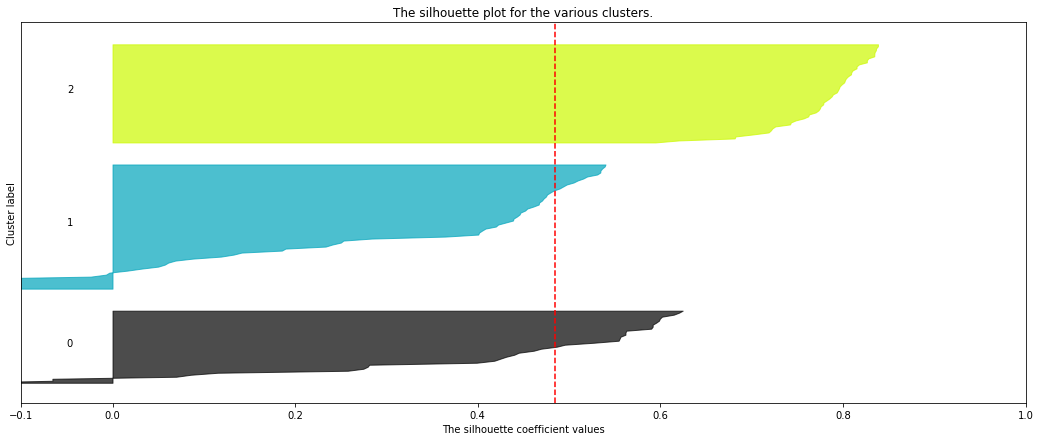

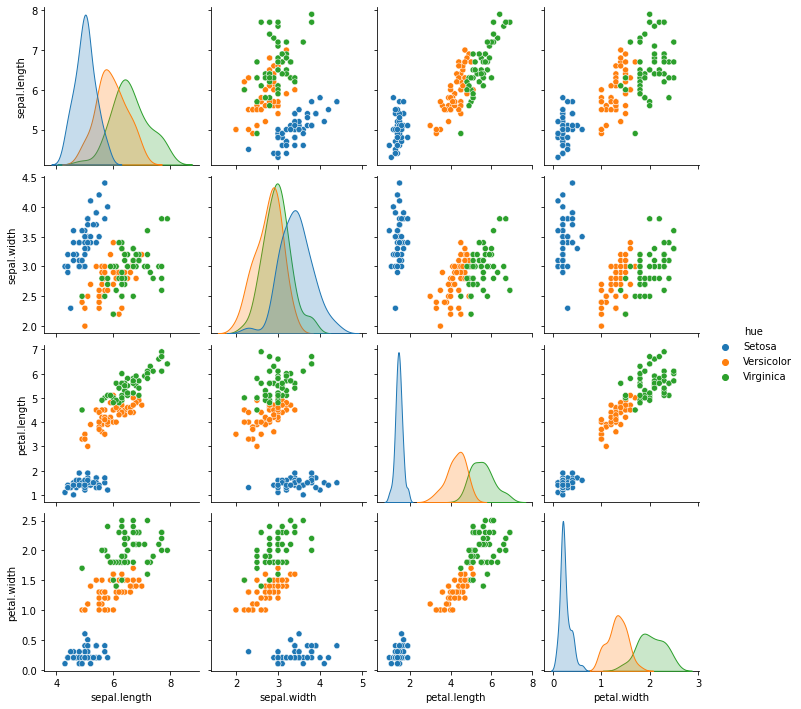

In [11]:
cl.calcExtValidation()
cl.calcPlotSilhouete()
cl.plotScatter()

Find best K with Elbow method

Calculating elbow for kClusters: 1
Calculating elbow for kClusters: 2
Calculating elbow for kClusters: 3
Calculating elbow for kClusters: 4
Calculating elbow for kClusters: 5


/home/dosclic98/.local/lib/python3.8/site-packages/numpy/core/numeric.py:2443: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a1, a2 = asarray(a1), asarray(a2)


Calculating elbow for kClusters: 6


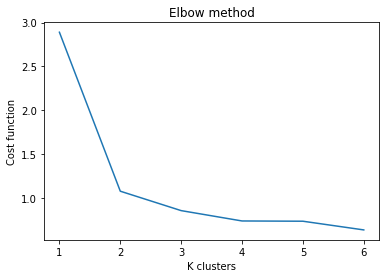

In [12]:
elbowMethod(dataset, 6, 10)

Try different k and print the silhouette

Lowest cost is: 2.889233960110386
For k clusters = 1 The average silhouette_score is : 1.0
Lowest cost is: 1.0746678619893297
For k clusters = 2 The average silhouette_score is : 0.6769492147686997
Lowest cost is: 0.8530032037782715
For k clusters = 3 The average silhouette_score is : 0.4847294778770669


/home/dosclic98/.local/lib/python3.8/site-packages/numpy/core/numeric.py:2443: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a1, a2 = asarray(a1), asarray(a2)


Lowest cost is: 0.7348858947995717
For k clusters = 4 The average silhouette_score is : 0.42695177755672753
Lowest cost is: 0.6663729634591716
For k clusters = 5 The average silhouette_score is : 0.3908962343047658
Lowest cost is: 0.6198456214249467
For k clusters = 6 The average silhouette_score is : 0.24716814815717134


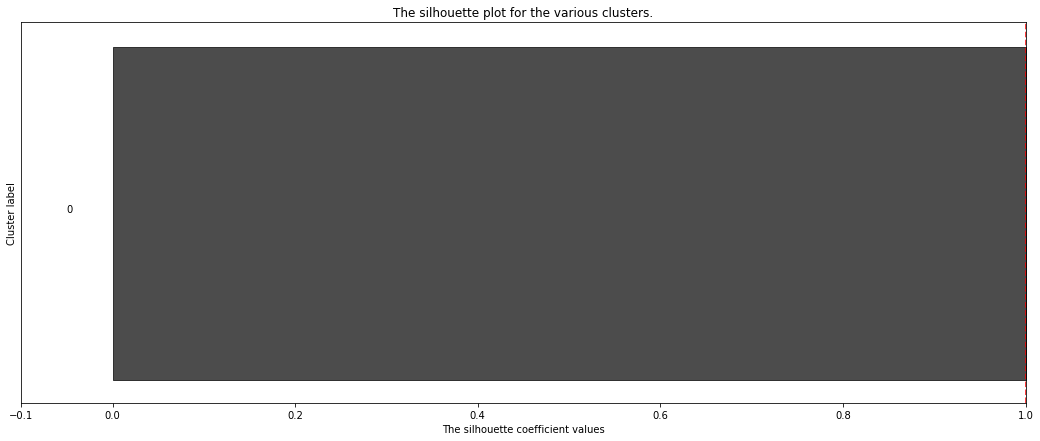

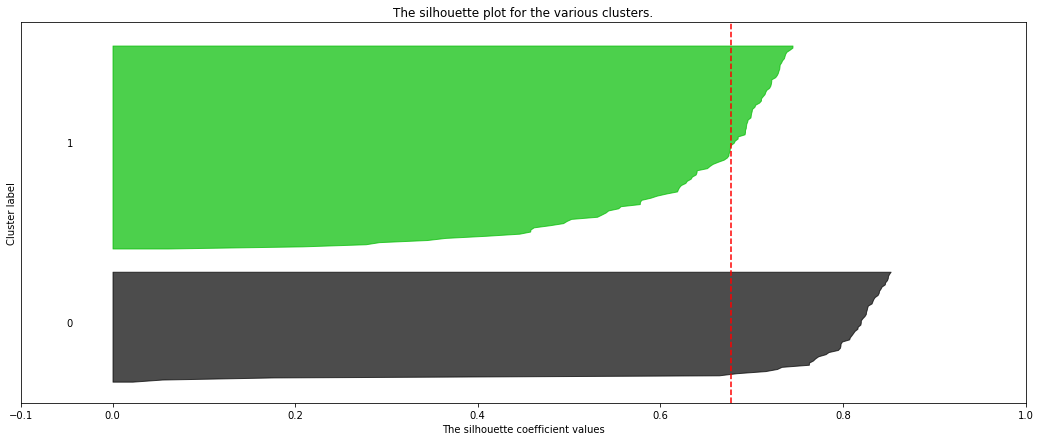

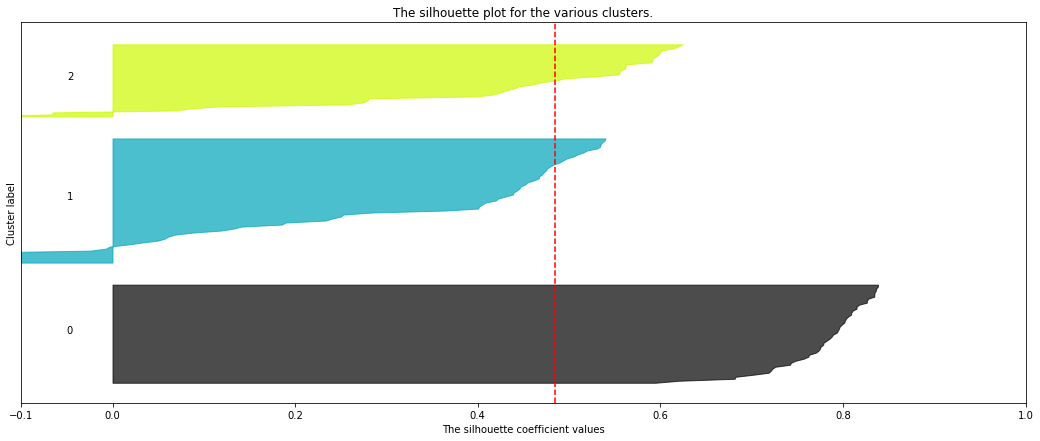

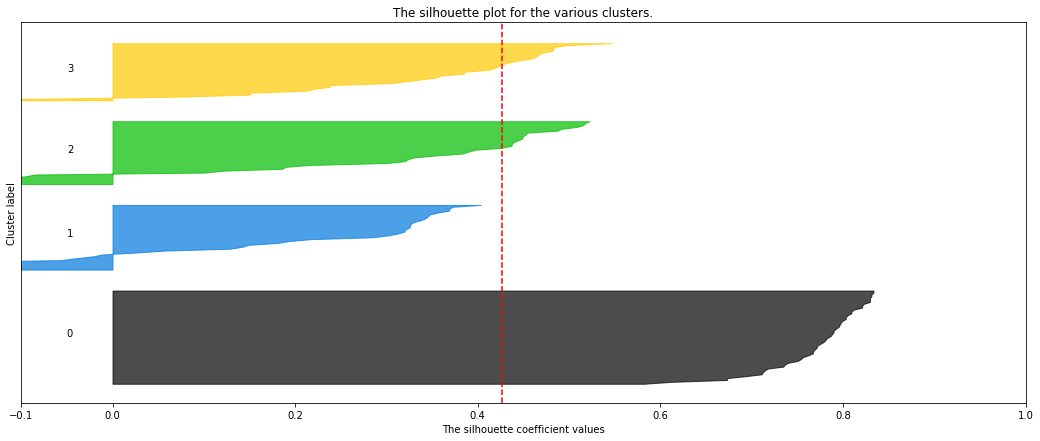

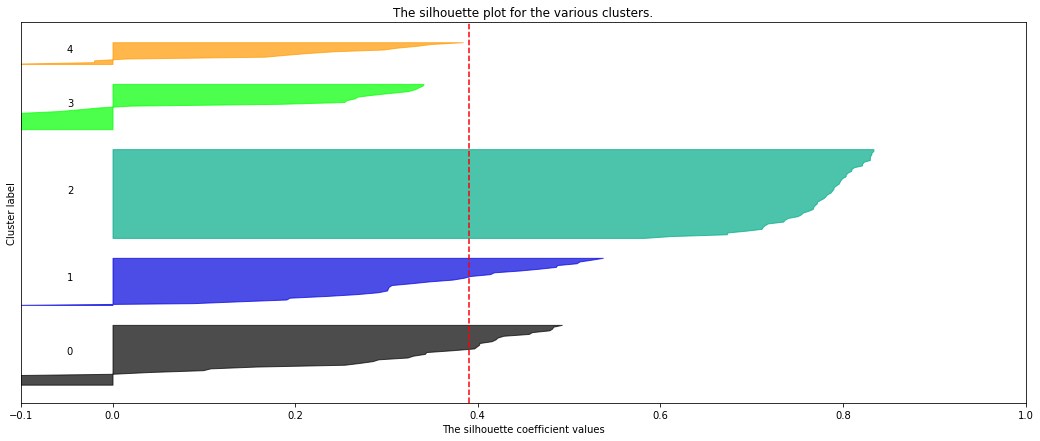

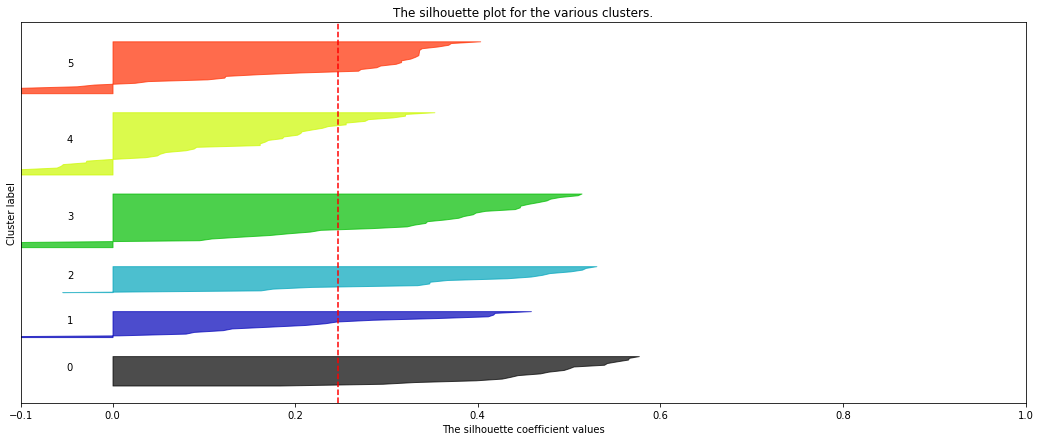

In [15]:
for i in range(1, 7):
    cl, cost = findBestClusering(dataset, i, 10)
    print("Lowest cost is:", cost)
    cl.calcPlotSilhouete()
    